# Exploratory Data Analysis Exercise

- For this part we will be using the `data/cars.csv` dataset


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline 
import scipy.stats as stats


In [2]:
import os

In [3]:
os.getcwd()

'c:\\Users\\winge\\OneDrive\\Desktop\\(C)Coding\\CUNY Tech Prep\\Fall 2023\\2023-fall-data-science-fridays'

In [4]:
os.chdir('c:\\Users\\winge\\OneDrive\\Desktop\\(C)Coding\\CUNY Tech Prep\\Fall 2023\\2023-fall-data-science-fridays\\Week-02-Data-Viz-EDA')

# Load in the data

- Use the file in the data folder called 'cars.csv'
- Save it as a varible named 'df'
- Display the first 5 rows of our dataframe


In [5]:
# Load data
df = pd.read_csv('data/cars.csv')
df.head()


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500


# Data clean up part 1.

1. Print the number of duplicate rows we have in our dataframe.

2. Modify our df to have all duplicate rows removed.

3. Do a sanity check to make sure all duplicates have been removed by printing the total number of duplicate rows again.


In [6]:
# 1. Print the number of duplicate rows we have in our dataframe.
df.duplicated().value_counts()[True]


720

In [7]:
#  2. Modify our df to have all duplicate rows removed. 

print(df.shape, 'before dropping dupes')


df = df.drop_duplicates()

print(df.shape, 'after dropping dupes')

(11914, 15) before dropping dupes
(11194, 15) after dropping dupes


In [8]:
# 3. Do a sanity check to make sure all duplicates have been removed by printing the total number of duplicate rows again.

df.duplicated().value_counts()
# No True values so duplicate has been removed

False    11194
dtype: int64

# Data clean up part 2.

- Which column has the most null values and how many null values does it have?
- Print how long our dataframe is.
- Remove any row that has a null value in it.
- Do a sanity check and pring how long our dataframe is now that we have removed our null values.


In [9]:
# * Which column has the most null values and how many null values does it have?
df.isnull().sum()
# Answer is Engine HP with 69

Make                  0
Model                 0
Year                  0
Engine Fuel Type      3
Engine HP            69
Engine Cylinders     30
Transmission Type     0
Driven_Wheels         0
Number of Doors       6
Vehicle Size          0
Vehicle Style         0
highway MPG           0
city mpg              0
Popularity            0
MSRP                  0
dtype: int64

In [10]:
# * Print how long our dataframe is.
df.info()
# Entries is our answer 11194 after removing duplicates


<class 'pandas.core.frame.DataFrame'>
Int64Index: 11194 entries, 0 to 11913
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11194 non-null  object 
 1   Model              11194 non-null  object 
 2   Year               11194 non-null  int64  
 3   Engine Fuel Type   11191 non-null  object 
 4   Engine HP          11125 non-null  float64
 5   Engine Cylinders   11164 non-null  float64
 6   Transmission Type  11194 non-null  object 
 7   Driven_Wheels      11194 non-null  object 
 8   Number of Doors    11188 non-null  float64
 9   Vehicle Size       11194 non-null  object 
 10  Vehicle Style      11194 non-null  object 
 11  highway MPG        11194 non-null  int64  
 12  city mpg           11194 non-null  int64  
 13  Popularity         11194 non-null  int64  
 14  MSRP               11194 non-null  int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 1.4+ MB


In [11]:
# * Remove any row that has a null value in it. 
print(df.shape)

# df.dropna(inplace=True)
df = df.dropna()

# Sanity Check
print(df.shape)


(11194, 15)
(11092, 15)


In [12]:
# * Do a sanity check and pricing how long our dataframe is now that we have removed our null values.
# pricing how many null values there are
df.isnull().sum()


Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

### Make a bar chart that displays how many times each brand of car appears in this data.

_Brand of car is the `Make` of the car._

- You can achieve this by using value_counts or by a groupby. Either is fine with me.


<Axes: xlabel='Amount of cars', ylabel='Make'>

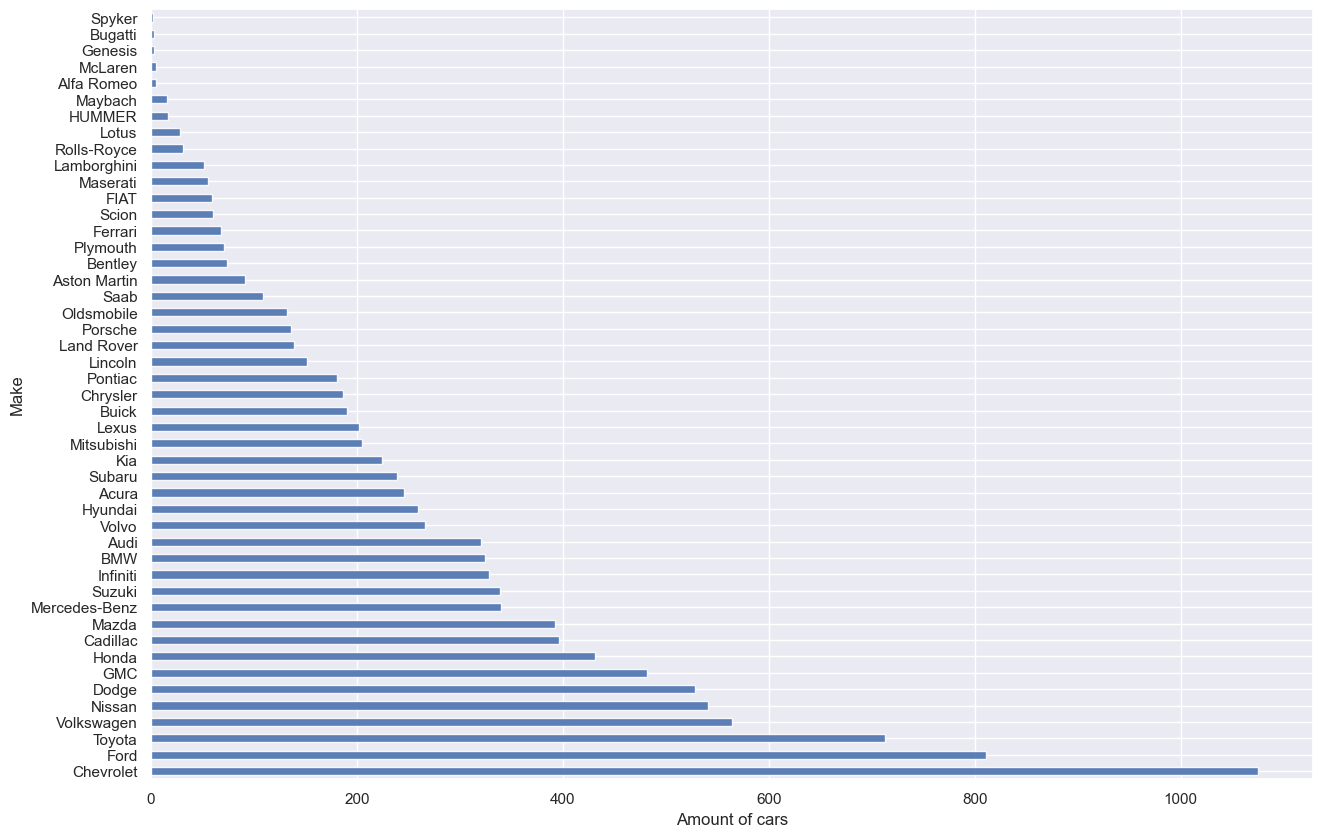

In [13]:
# Make a bar chart that displays how many times each brand of car appears in this data. 
# brand_of_car = df.groupby('Make')

# brand_of_car.plot(kind="barh")

brand_of_car = df.value_counts('Make')
brand_of_car.plot(kind="barh", figsize=(15,10),alpha=0.9,xlabel='Amount of cars')

# Make a timeline line chart in which the x-axis is the Year, and the y-axis is the mean MSRP.

- you're going to have to do a `groupby` for this one for sure.
- What's noticeable about it and what do you think the error is...


While the MSRP is the manufacturer's recommended price for the vehicle


<Axes: xlabel='Year'>

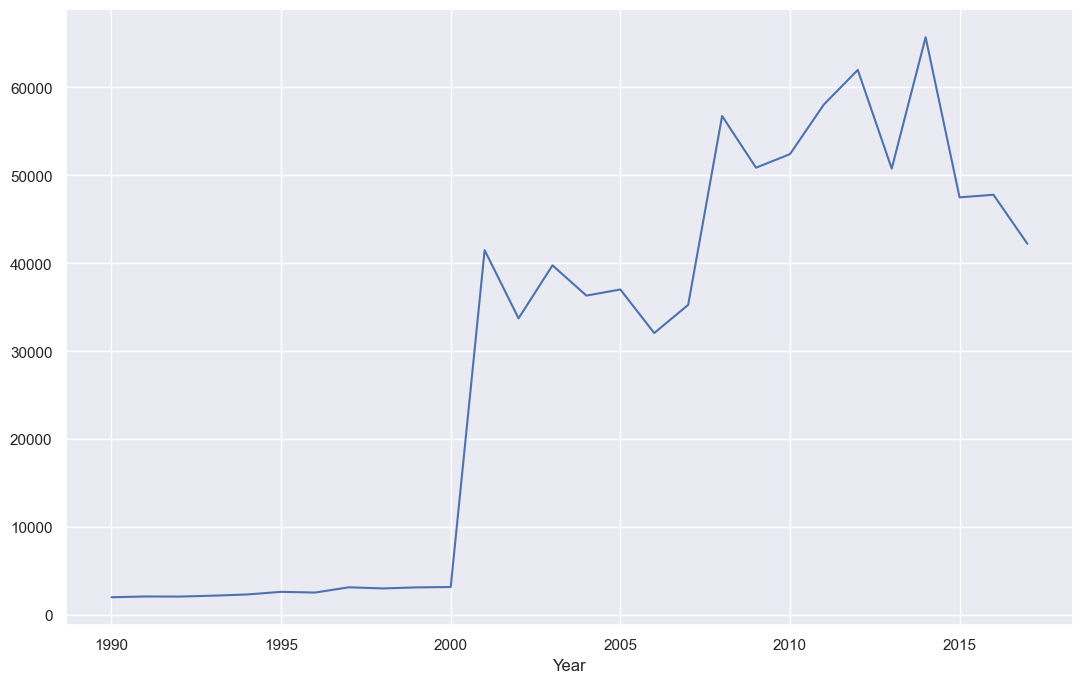

In [14]:
# Make a timeline line chart in which the x-axis is the year, and the y-axis is the average MSRP.
year_and_MSRP = df.groupby('Year')

average_MSRP = year_and_MSRP['MSRP'].mean()

average_MSRP.plot(kind='line',x='Year',y='MSRP',figsize=(13,8))
# the error here is the average prices of MSRP was significantly less before 2000s. So it is hard to see that data within the those years

# It seems as though in the years before (and including) 2000, they were counting in tens.

Make a new column that is called `adjusted_price`, that contains all prices, however, for every year before 2000 make it 10x the original MSRP.

- Hint; you might need to use our old friend `np.where`


In [15]:
# Make a column where is 10 when year is less than 2000, else 1.
df['adjusted_price'] = np.where(df['Year'] <= 2000, 10, 1)

# Multiply the MSRP by the price adjuster.
adjusted_price = df['adjusted_price'] * 10

adjusted_price.value_counts()

# year = df.groupby('Year')
# year_model_2000_or_less = np.where('Year' >= 2000)

# select_condition_of_2000s_or_less = df['Year'] >= 2000

# df_2000s_or_less = df[select_condition_of_2000s_or_less]
# df['adjusted_price'] = df_2000s_or_less['MSRP'] * 10

10     9728
100    1364
Name: adjusted_price, dtype: int64

# Replot the new adjusted price.

- Make the y-axis start at 0 and go up to 100,000


10     9728
100    1364
Name: adjusted_price, dtype: int64


<Axes: xlabel='Year'>

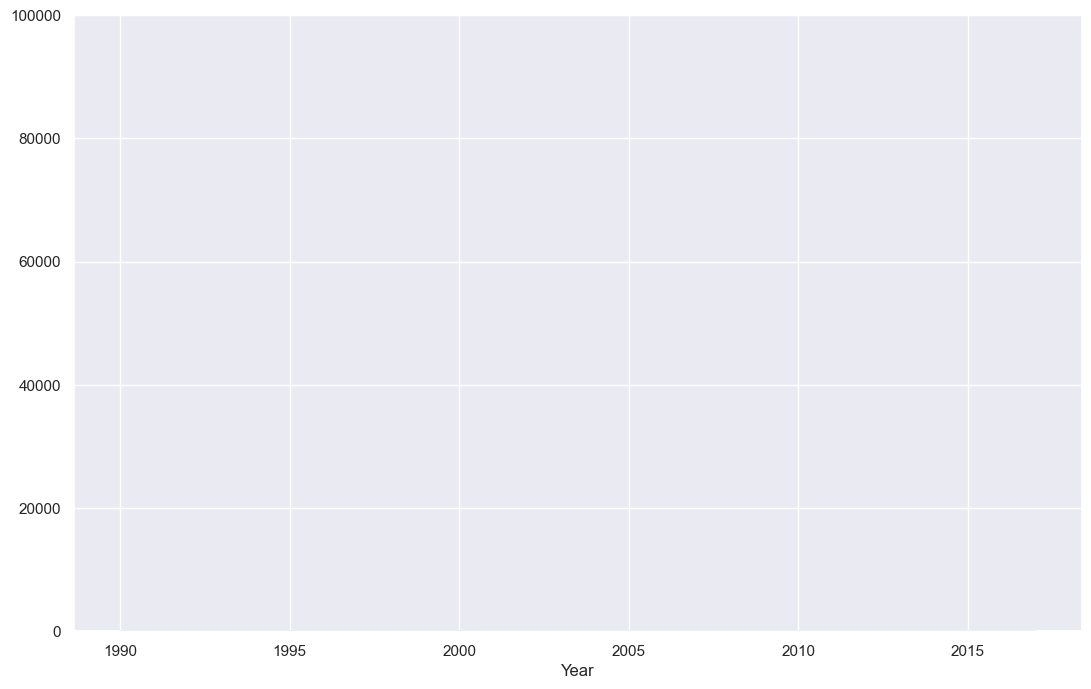

In [16]:
# Plot new prices
new_year_and_MSRP = df.groupby('Year')


print(adjusted_price.value_counts())


new_average_MSRP = new_year_and_MSRP['adjusted_price'].mean()


new_average_MSRP.plot(kind='line',x='Year',y='adjusted_price',figsize=(13,8),ylim=(0,100000))


# Plot the relationship between Engine HP and highway MPG


<Axes: xlabel='Engine HP', ylabel='highway MPG'>

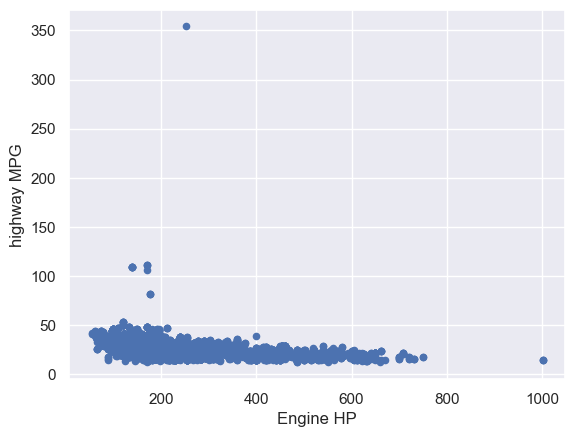

In [17]:
# Plot the relationship between Engine HP and highway MPG
df.plot(kind='scatter',x='Engine HP',y='highway MPG',)

In [18]:
### IF WE DIDN'T GET TO REMOVING OUTLIERS IN CLASS, THEN YOU CAN SKIP THIS SECTION
# Remove any outliers from Engine HP and highway MPG 

condition_remove_outlier_Engine_HP = df['Engine HP'] < 800 
condition_remove_outlier_highway_MPG = df['highway MPG'] < 80



# Replot the relationship between Engine HP and highway MPG


C:\Users\winge\AppData\Local\Temp\ipykernel_5192\1080796218.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[condition_remove_outlier_Engine_HP][condition_remove_outlier_highway_MPG]


<Axes: xlabel='Engine HP', ylabel='highway MPG'>

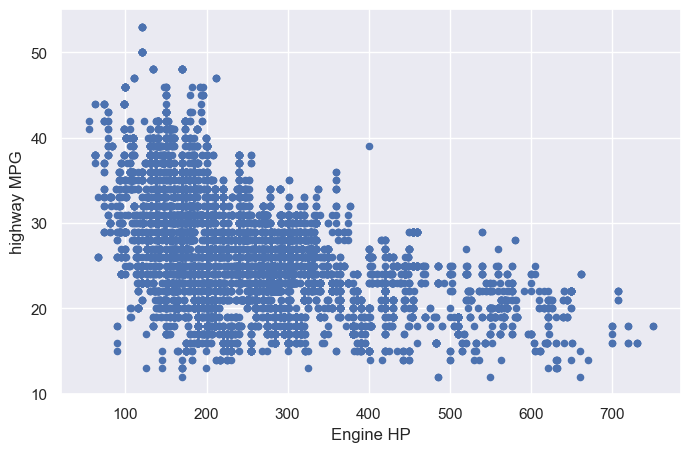

In [19]:
# Re-Plot the relationship between Engine HP and highway MPG
df = df[condition_remove_outlier_Engine_HP][condition_remove_outlier_highway_MPG]

df.plot(kind='scatter', x='Engine HP', y='highway MPG',figsize=(8,5))

# Make a scatter plot of Engine HP vs highway MPG


C:\Users\winge\AppData\Local\Temp\ipykernel_5192\21308897.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[condition_remove_outlier_Engine_HP][condition_remove_outlier_highway_MPG]


<Axes: xlabel='Engine HP', ylabel='highway MPG'>

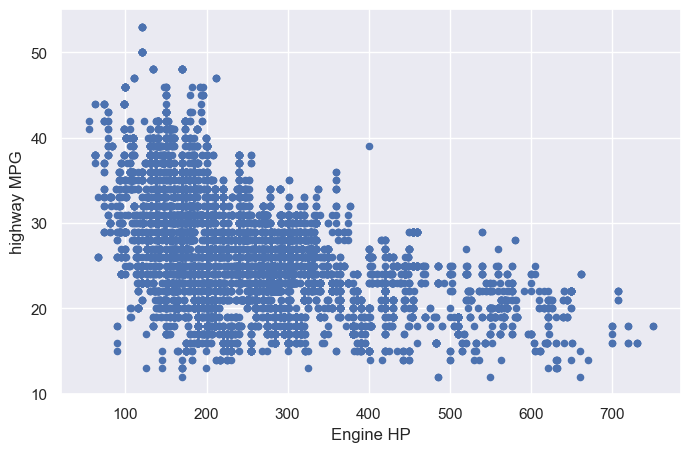

In [20]:
# Make a scatter plot of Engine HP vs highway MPG
df = df[condition_remove_outlier_Engine_HP][condition_remove_outlier_highway_MPG]

df.plot(kind='scatter', x='Engine HP', y='highway MPG',figsize=(8,5))

# What does this plot tell you about how Engine HP affects highway MPG?


In [21]:
# What does this plot tell you about how Engine HP affects highway MPG?

print('This is a weak negative linear correlation. However it shows as Engine HP increases, highway MPG decreases. Then the more highway MPG increases, Engine HP decreases.')

This is a weak negative linear correlation. However it shows as Engine HP increases, highway MPG decreases. Then the more highway MPG increases, Engine HP decreases.


# Using a pairplot, display all of the linear relationship.

- Which variables look like they have the strongest linear relationship (Besides MSRP and adjusted_price).


  Make       Model  Year             Engine Fuel Type  Engine HP  \
0  BMW  1 Series M  2011  premium unleaded (required)      335.0   
1  BMW    1 Series  2011  premium unleaded (required)      300.0   
2  BMW    1 Series  2011  premium unleaded (required)      300.0   
3  BMW    1 Series  2011  premium unleaded (required)      230.0   
4  BMW    1 Series  2011  premium unleaded (required)      230.0   

   Engine Cylinders Transmission Type     Driven_Wheels  Number of Doors  \
0               6.0            MANUAL  rear wheel drive              2.0   
1               6.0            MANUAL  rear wheel drive              2.0   
2               6.0            MANUAL  rear wheel drive              2.0   
3               6.0            MANUAL  rear wheel drive              2.0   
4               6.0            MANUAL  rear wheel drive              2.0   

  Vehicle Size Vehicle Style  highway MPG  city mpg  Popularity   MSRP  \
0      Compact         Coupe           26        19        3

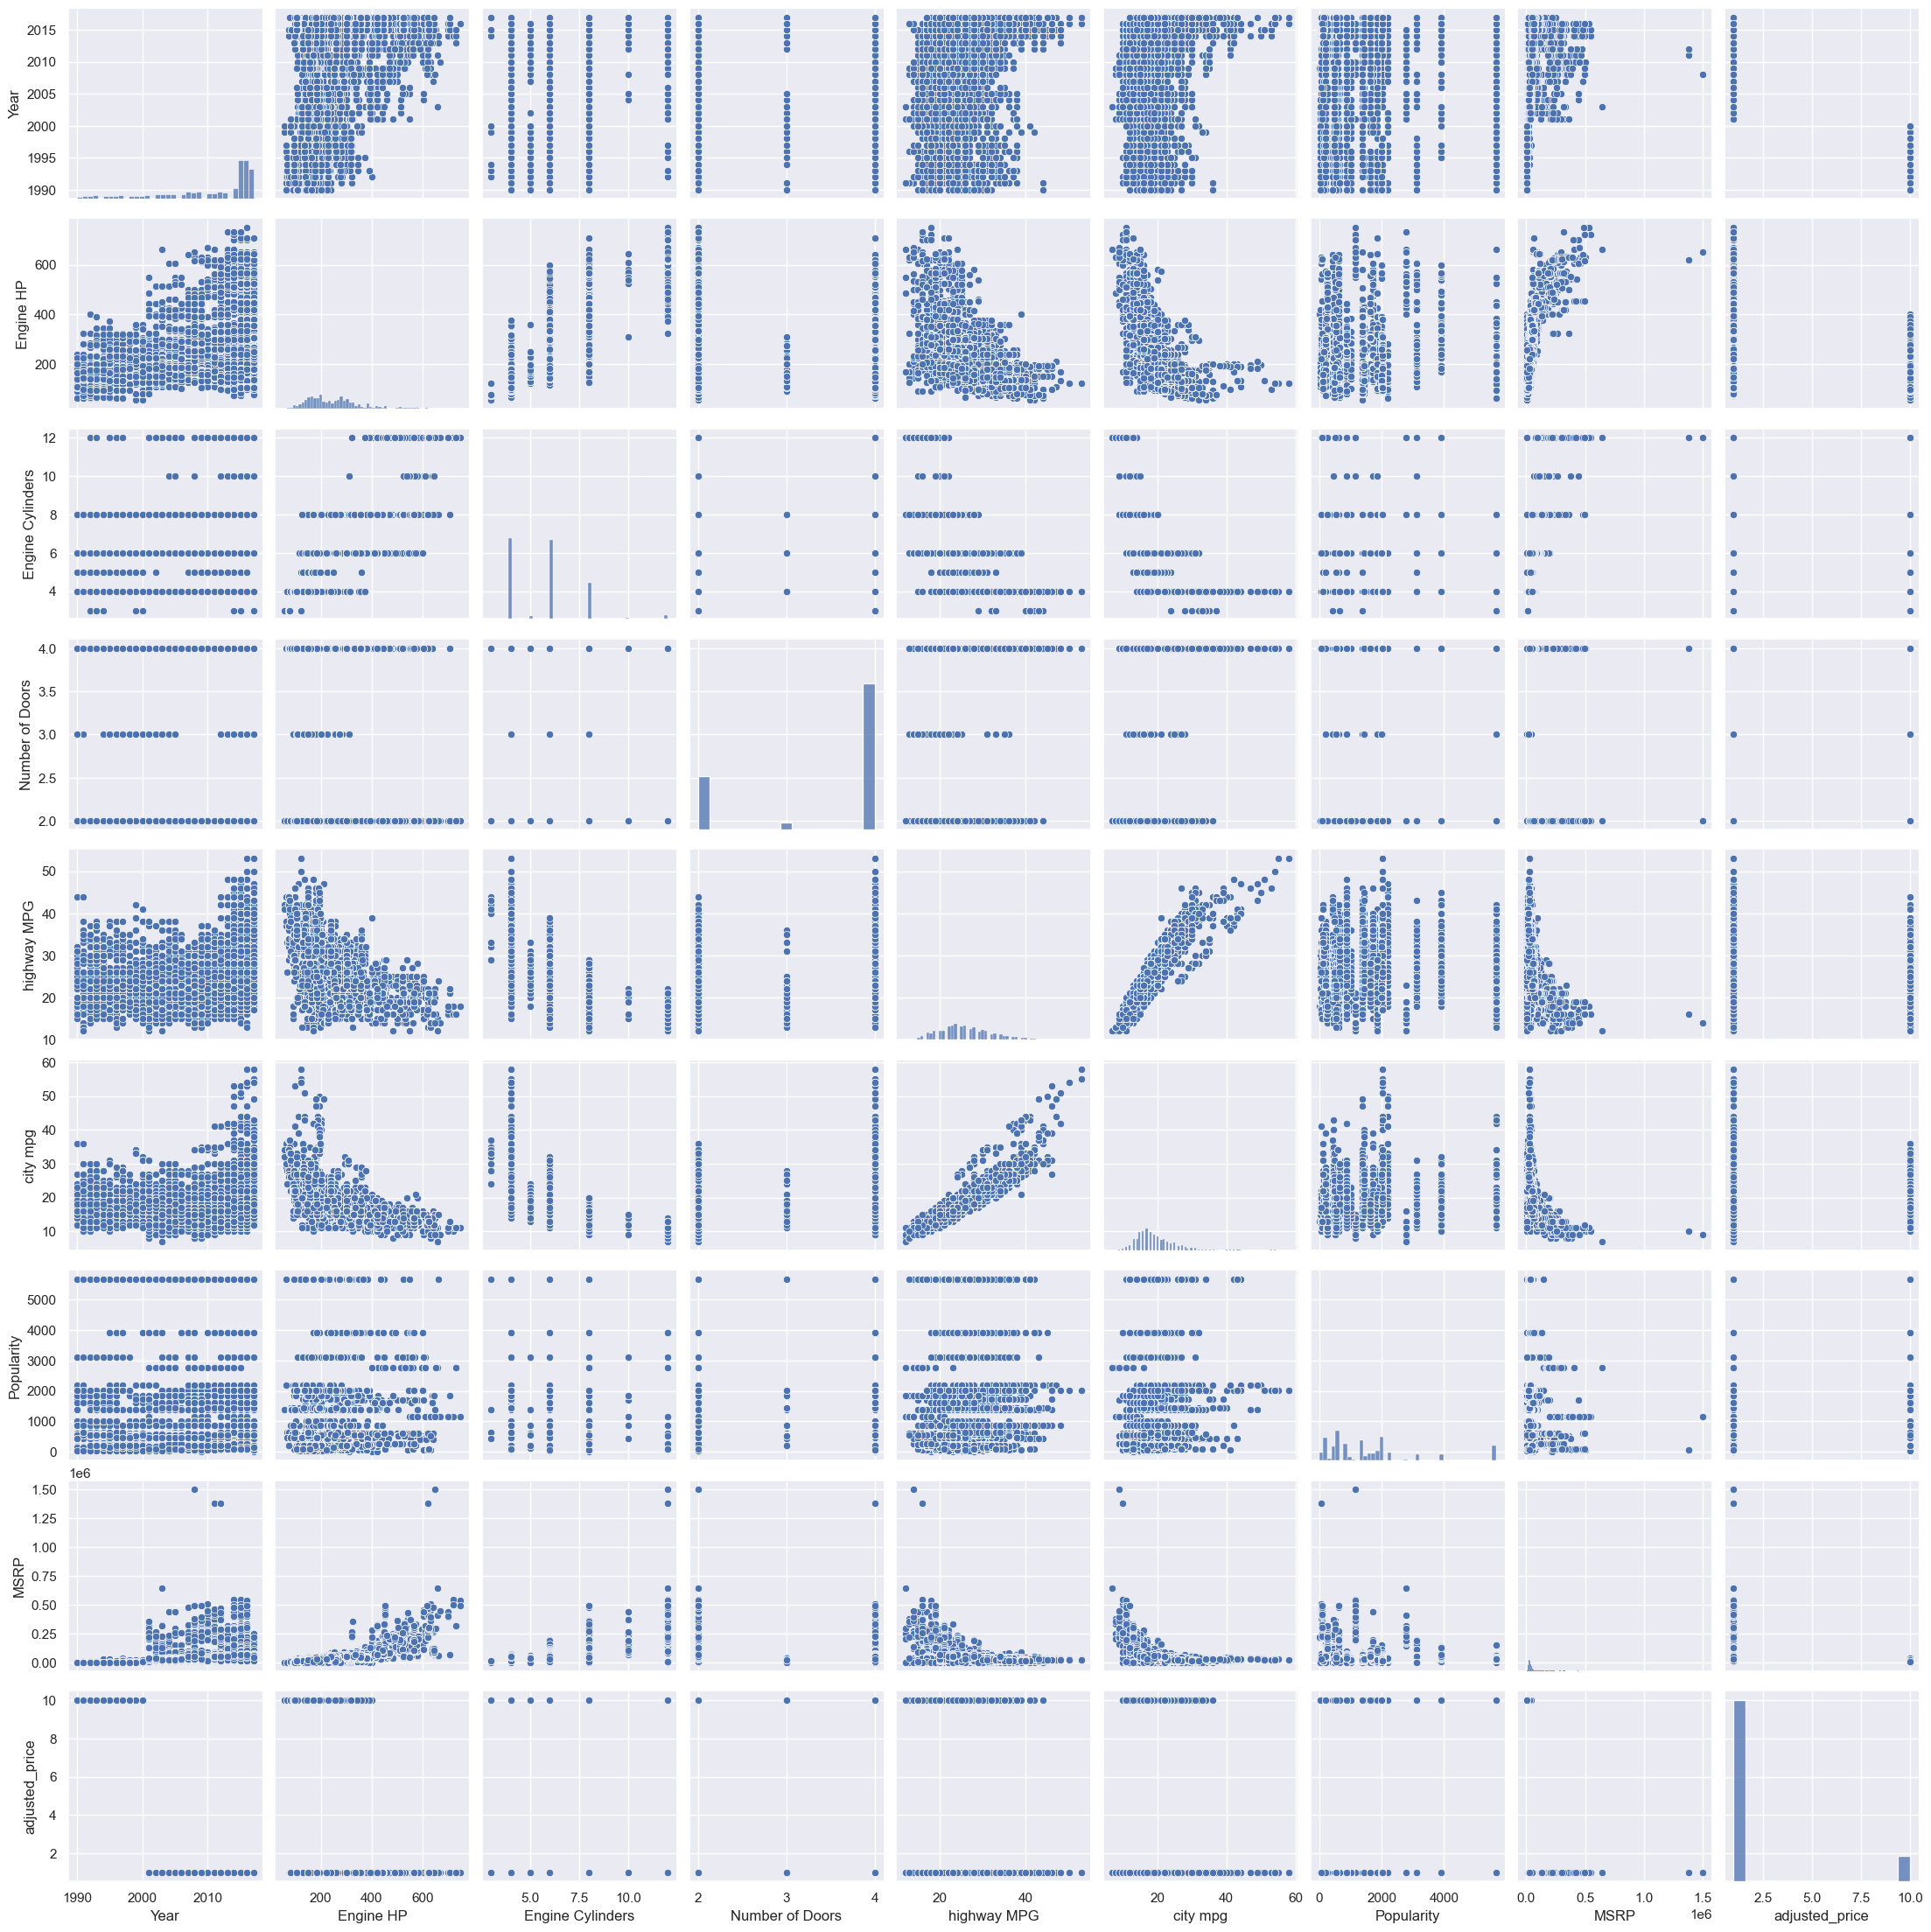

In [28]:
# Using a pairplot, display all of the linear relationship.
sns.set_style('darkgrid')

print(df.head())

sns.pairplot(df)

In [32]:
# * Which variables look like they have the strongest linear relationship (Besides MSRP and adjusted_price).
print('It seems like city mpg & highway MPG have the strong linear relationship')


It seems like city mpg & highway MPG have the strong linear relationship


# Find which features actually have the strongest linear relationship using correlations.

- Make a heatmap plot of all of the correlations in our dataset.
- Change the figure size of our heatmap plot to be 8x8
- **Which feature does Engine HP have the strongest relationship with, and why do you think that relationship exists.**


In [45]:
df = df.drop(columns=['Year'])
df.corr()

C:\Users\winge\AppData\Local\Temp\ipykernel_5192\2058033276.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP,adjusted_price
Engine HP,1.000000,0.788060,-0.125942,-0.493548,-0.542841,0.042862,0.689708,-0.284557
Engine Cylinders,0.788060,1.000000,-0.144488,-0.688365,-0.686333,0.044929,0.578498,-0.030469
Number of Doors,-0.125942,-0.144488,1.000000,0.126863,0.148305,-0.059783,-0.150162,-0.228017
highway MPG,-0.493548,-0.688365,0.126863,1.000000,0.918881,-0.040457,-0.262243,-0.166544
city mpg,-0.542841,-0.686333,0.148305,0.918881,1.000000,-0.017655,-0.290227,-0.126298
Popularity,0.042862,0.044929,-0.059783,-0.040457,-0.017655,1.000000,-0.050352,-0.013915
MSRP,0.689708,0.578498,-0.150162,-0.262243,-0.290227,-0.050352,1.000000,-0.265390
adjusted_price,-0.284557,-0.030469,-0.228017,-0.166544,-0.126298,-0.013915,-0.265390,1.000000


C:\Users\winge\AppData\Local\Temp\ipykernel_5192\880750876.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap="Blues")


<Axes: >

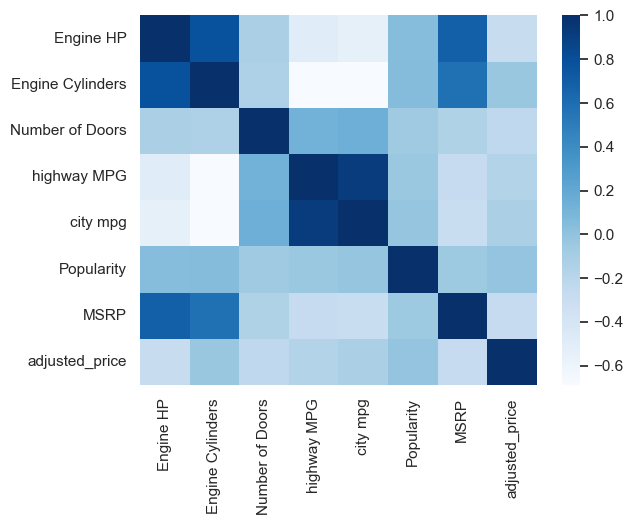

In [47]:
# * Make a heatmap plot of all of the correlations in our dataset.
# * Change the figure size of our heatmap plot to be 8x8
heatmap_for_engine_HP = df['Engine HP']

sns.heatmap(df.corr(), cmap="Blues")


In [49]:
# Which feature does Engine HP have the strongest relationship with, and why do you think that relationship exists.

print('The strongest relationship is with MSRP and Engine Cylinders')
print('The relationship between MSRP and Engine Cylinders exist because the speed of the car is determined by the number of cylinders in the vehicle engine, which gives it more Engine HP. Ultimately, this relationship increases the MSRP value.')

The strongest relationship is with MSRP and Engine Cylinders
The relationship between MSRP and Engine Cylinders exist because the faster the car is determined by the number of cylinders in the vehicle engine, which gives it more Engine HP. Ultimately, this relationship increases the MSRP value.


# [EXTRA CREDIT]

- (EASY) In the column names, replace all the spaces with an underscore, and make them all lowercase as well.

- (Easy) Learn more about cleaning data by following along in TA Georgios' tutorial in TA-Tips folder named `GI-Tips_1.ipynb`.

- (Medium) Do the same vizualizations using bokeh by following along in TA Stevens tutorial in the TA-Tips folder named `SS-Tips.ipynb`.

- (Medium) Learn how to remove outliers properly by following along in TA Georgios' tutorial in TA-Tips folder named `GI-Tips_2.ipynb`.

- (Variable) Complete one or more of the [Extra-Extra credit](https://docs.google.com/document/d/1D99fY13cF3kzIiJILZ3fwzhOF73z_xPBNxxweMpBkOY/edit) items.
